In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import mixedlm

import scipy as sp
from scipy.stats import shapiro
from scipy import stats
from scipy.stats import levene

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import RobustScaler

##### A helpful gituhub article written about mixed linear models:
https://github.com/kshedden/Statsmodels-MixedLM

##### Also a helpful example/discussion
https://github.com/statsmodels/statsmodels/issues/6802

##### Very helpful
https://www.pythonfordatascience.org/mixed-effects-regression-python/

http://mfviz.com/hierarchical-models/

In [2]:
#indicate the indexing variable for searching the original csv
#e.g. 'Start Guppy Timestamp (s)', 'End Guppy Timestamp (s)'
refvar = 'Start Guppy Timestamp (s)'

#Assign what you want this variable to be called in your plots, will override the guppy column variable to this
#This will also be used to search for the matching value in the refvar
#e.g. 'First Lick','Last Lick'
plotvar = 'First Lick'

#assign the variable you want to use to sort the trials (must be the the name used in the original csv)
#e.g. 'Lick Bout Duration (ms)', 'Most Recent Volume'
sortvar = 'Lick Bout Duration (ms)'

In [3]:
lickboutdf = pd.read_csv('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/IntermediatePythonOutput/DNDSessionlickboutdf_022923rerunnotebook.csv') 
lickboutdf[refvar] = lickboutdf[refvar] - 1 #account for the 1 second removed by Guppy from beginning of the photometry session

In [4]:
dflist = []
for root, dirs, files in os.walk('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3'):
    for file in files:
        if  (file.find('Uncorrected') == -1) & (file.find('peak') != -1) & (root.find('output_1') != -1) & (file.find('First') != -1) & (file.find('RewardVolume') != -1) & (file.find('z_score') != -1) & (file.find('.h5') != -1):
            print(root + file)
            mouse = root.split('/')[-2]
            day = root.split('/')[-3]
            print(mouse, root + '/' + file)
            df = pd.read_hdf(root + '/' + file)
            timestamp = [i[1] for i in df.index.str.split('_')]
            df.insert(0, 'Mouse', mouse)
            df.insert(1, 'Day', day)
            df.insert(2,'timestamps', timestamp)
            df = df.melt(id_vars=['Mouse','Day','timestamps'])
            df = df[~df['variable'].isin(['mean','err'])]
            dflist.append(df)
dfFullSet = pd.concat(dflist)


/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-1L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1/peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-15uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
JAX-15F-1L /Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1/peak_AUC_First-15uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3/JAX-15F-1L/JAX-15F-1L_output_1peak_AUC_First-20uLRewardVolume_ZI-PRN_z_sc

Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-16M-1R\JAX-16M-1R_output_1peak_AUC_First-5uLRewardVolume_ZI-SC_z_score_ZI-SC.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-16M-1R\JAX-16M-1R_output_1/peak_AUC_First-5uLRewardVolume_ZI-SC_z_score_ZI-SC.h5
Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-16M-2L\JAX-16M-2L_output_1peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-16M-2L\JAX-16M-2L_output_1/peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-16M-2L\JAX-16M-2L_output_1peak_AUC_First-15uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/Fibe

Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-17M-1R\JAX-17M-1R_output_1peak_AUC_First-5uLRewardVolume_ZI-SC_z_score_ZI-SC.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-17M-1R\JAX-17M-1R_output_1/peak_AUC_First-5uLRewardVolume_ZI-SC_z_score_ZI-SC.h5
Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-17M-2L\JAX-17M-2L_output_1peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-17M-2L\JAX-17M-2L_output_1/peak_AUC_First-10uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
Z:/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/GuppyFormatCsvs2-2-24/Day3\JAX-17M-2L\JAX-17M-2L_output_1peak_AUC_First-15uLRewardVolume_ZI-PRN_z_score_ZI-PRN.h5
GuppyFormatCsvs2-2-24 Z:/RKDATA/Behavior/Fibe

In [72]:
dflist = []
for group, df in dfFullSet[dfFullSet['timestamps'] != 'mean'].groupby(['Day','Mouse','timestamps']):

    #get the index of the row that has the timestamp value of the plotvar that is closest to the refvar
    closest_index = (lickboutdf[(lickboutdf['Day'] == group[0]) &
                     (lickboutdf['Mouse'] == group[1])][refvar] - float(group[2])).abs().idxmin()

    # Get the value at the closest index
    closest_value = lickboutdf.loc[closest_index, sortvar]
    temp = df
    temp[sortvar] = closest_value
    if group[1].find('L') != -1:
        temp['Projection Type'] = 'ZI-PRN'
    elif group[1].find('R') != -1:
        temp['Projection Type'] = 'ZI-SC'
    dflist.append(temp)

sortableDF2 = pd.concat(dflist).reset_index(drop = True)
sortableDF2[sortvar] = sortableDF2[sortvar].astype(float)
#sortableDF2[plotvar] = sortableDF2[plotvar].astype(float)

In [99]:
sortableDF3 = sortableDF2.rename(columns = {'Projection Type' : 'Projection_Type', 
                                            'Lick Bout Duration (ms)':'LickBoutDuration_ms',
                                            'Lick Bout Duration (s)':'LickBoutDuration_s'}).copy()

In [100]:
sortableDF3['Lick Bout Duration (s)'] = sortableDF3['LickBoutDuration_ms'] / 1000

In [101]:
sortableDF3 = sortableDF3.rename(columns = {'Projection Type' : 'Projection_Type', 
                                            'Lick Bout Duration (ms)':'LickBoutDuration_ms',
                                            'Lick Bout Duration (s)':'LickBoutDuration_s'}).copy()

In [5]:
sortableDF3 = pd.read_csv('/Users/ryankast/Desktop/sortableDF3_061724.csv')
sortableDF3.drop('Unnamed: 0', axis = 1, inplace =True)

In [6]:
sortableDF3

,Mouse,Day,timestamps,variable,value,LickBoutDuration_ms,Projection_Type,LickBoutDuration_s
0,JAX-15F-1L,Day3,1023.161483,peak_pos_1,1.384400,1632.0,ZI-PRN,1.632
1,JAX-15F-1L,Day3,1023.161483,peak_neg_1,-0.760507,1632.0,ZI-PRN,1.632
2,JAX-15F-1L,Day3,1023.161483,area_1,29.780674,1632.0,ZI-PRN,1.632
3,JAX-15F-1L,Day3,1023.161483,peak_pos_2,0.251909,1632.0,ZI-PRN,1.632
4,JAX-15F-1L,Day3,1023.161483,peak_neg_2,-0.760507,1632.0,ZI-PRN,1.632
...,...,...,...,...,...,...,...,...
12790,JAX-17M-3L,Day3,941.109477,peak_neg_4,-0.229780,2091.0,ZI-PRN,2.091
12791,JAX-17M-3L,Day3,941.109477,area_4,139.586460,2091.0,ZI-PRN,2.091
12792,JAX-17M-3L,Day3,941.109477,peak_pos_5,3.127054,2091.0,ZI-PRN,2.091
12793,JAX-17M-3L,Day3,941.109477,peak_neg_5,-0.827986,2091.0,ZI-PRN,2.091


In [7]:
ptdict = {'ZI-PRN' : 1, 
          'ZI-SC': 2}
iddict = {}
count = 1
for i in sortableDF3['Mouse'].unique().tolist():
    iddict[i] = count
    count +=1
    
n = [ptdict[i] for i in sortableDF3['Projection_Type']]
m = [iddict[i] for i in sortableDF3['Mouse']]


In [8]:
sortableDF3['PT'] = n

In [9]:
sortableDF3['ID'] = m

In [10]:
#sns.histplot(sortableDF3[sortableDF3['variable'] == 'area_3'], x = 'value', hue = 'Projection_Type')

In [11]:
var = 'area_3'

for CT in sortableDF3['Projection_Type'].unique().tolist():
    stat, p = shapiro(sortableDF3[(sortableDF3['Projection_Type'] == CT) & 
                      (sortableDF3['variable'] == var)]['value'])
    alpha = 0.05

    if p > alpha:
        print(var + " of " + CT +  " looks normally distributed (fail to reject H0)")
    else:
        print(var + " of " + CT +  " does not look normally distributed (reject H0)")

area_3 of ZI-PRN does not look normally distributed (reject H0)
area_3 of ZI-SC looks normally distributed (fail to reject H0)


In [12]:
lstat, p2 = levene(sortableDF3[(sortableDF3['Projection_Type'] == 'ZI-SC')&(sortableDF3['variable'] == var)]['value'],
                   sortableDF3[(sortableDF3['Projection_Type'] == 'ZI-PRN')&(sortableDF3['variable'] == var)]['value'])

if p2 > alpha:
    print("Variances of " + var + " are homogeneous (fail to reject H0)")
else:
    print("Variances of " + var + "are not homogeneous (reject H0)")

Variances of area_3 are homogeneous (fail to reject H0)


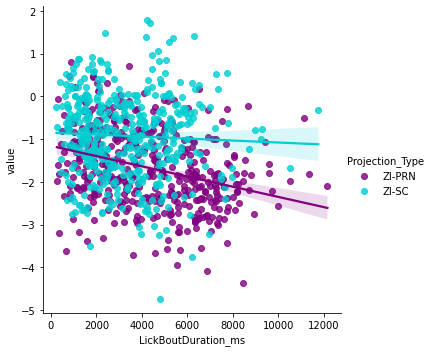

In [13]:
sns.lmplot(sortableDF3[sortableDF3['variable'] == 'peak_neg_3'],x='LickBoutDuration_ms', 
                        y = 'value',
                       hue = 'Projection_Type',
                       palette = ['purple', 'darkturquoise'])

[Text(0.5, 0, 'AUC')]

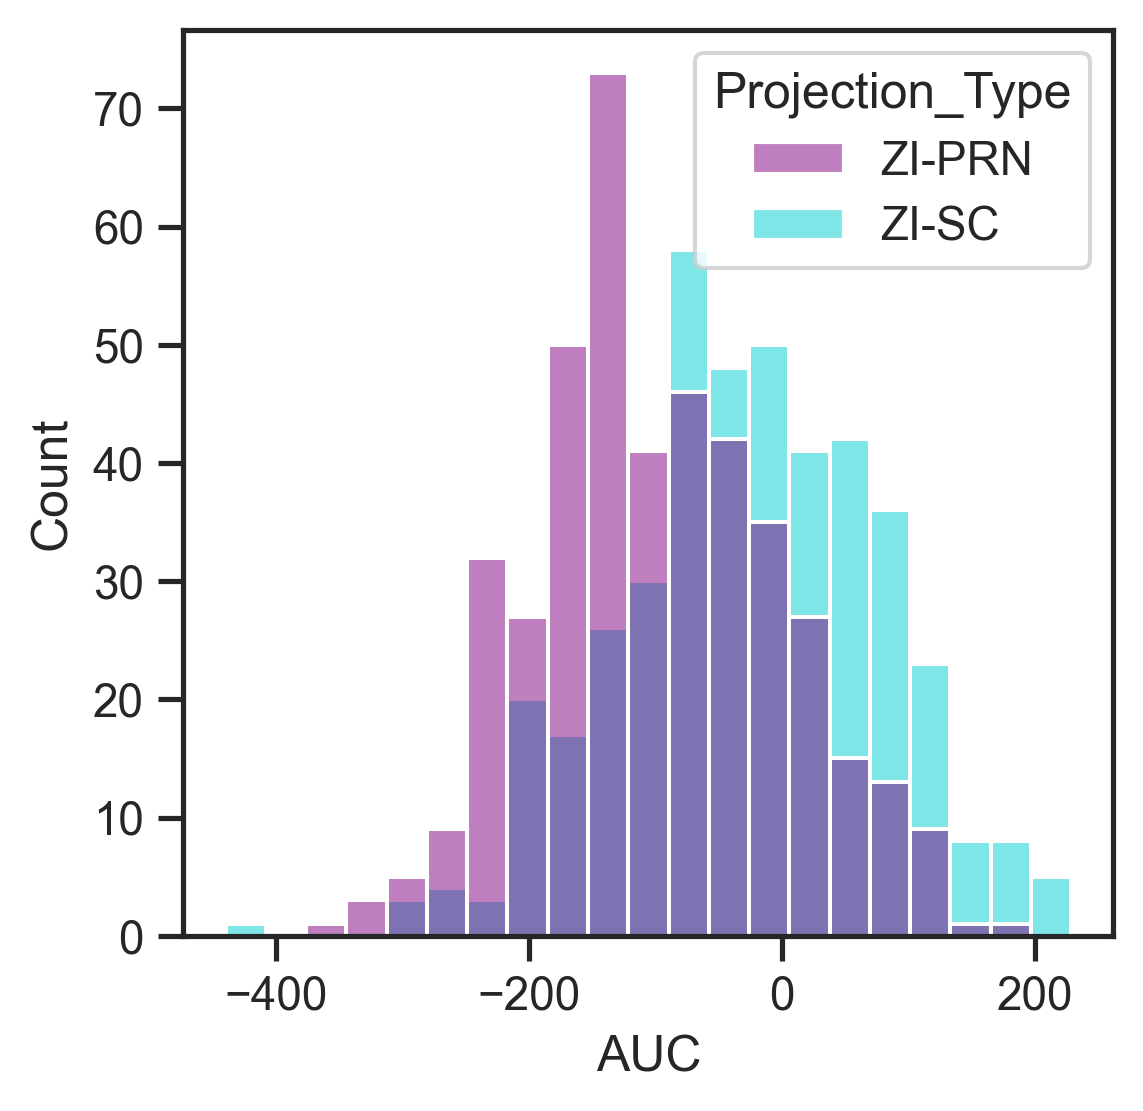

In [16]:
sns.set_theme(style = 'ticks', font_scale = 1)
plt.figure(figsize = (4,4), dpi = 300)
df = sortableDF3[sortableDF3['variable'] == 'area_3']
ax = sns.histplot(df,x='value', 
                       hue = 'Projection_Type',
                       palette = ['purple', 'darkturquoise'])


ax.set(xlabel = 'AUC')


<Figure size 1200x1200 with 0 Axes>

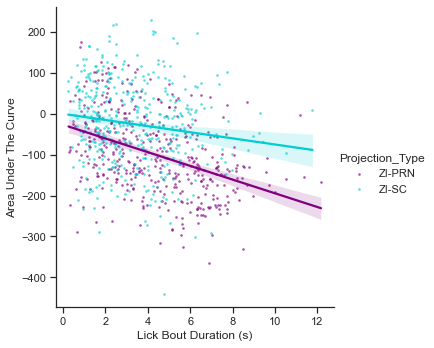

In [17]:
sns.set_theme(style = 'ticks', font_scale = 1)
plt.figure(figsize = (4,4), dpi = 300)
df = sortableDF3[sortableDF3['variable'] == 'area_3']
ax = sns.lmplot(df,x='LickBoutDuration_s', 
                        y = 'value',
                       hue = 'Projection_Type',
                       palette = ['purple', 'darkturquoise'],scatter_kws={"s": 3, 'alpha':0.5})

ax.set(ylabel = 'Area Under The Curve')
ax.set(xlabel = 'Lick Bout Duration (s)')

#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/lmplot_area3vsLickBoutDuration2.svg', dpi = 300, bbox_inches = 'tight')
#plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/lmplot_area3vsLickBoutDuration2.png', dpi = 300, bbox_inches = 'tight')

In [18]:
sns.set_theme(style = 'ticks', font_scale = 1.5)

In [22]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['LickBoutDuration_s'], data['value'])
    ax = plt.gca()
    ax.text(.6, .8, 'r = {:.2f}\np = {:.2g}'.format(r, p),
            transform=ax.transAxes)
    


<Figure size 1200x1200 with 0 Axes>

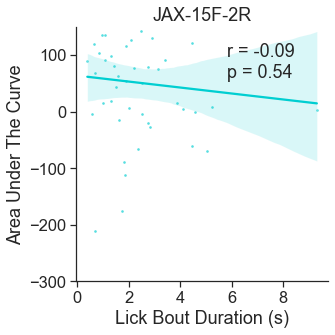

<Figure size 1200x1200 with 0 Axes>

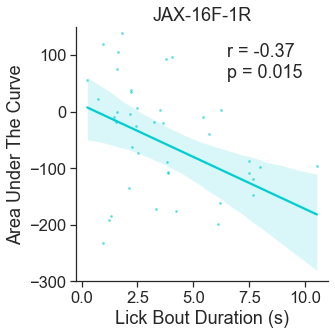

<Figure size 1200x1200 with 0 Axes>

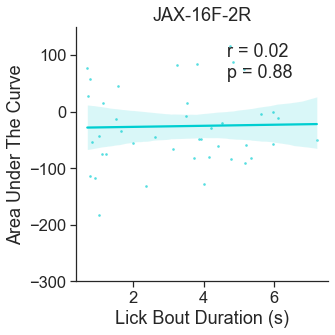

<Figure size 1200x1200 with 0 Axes>

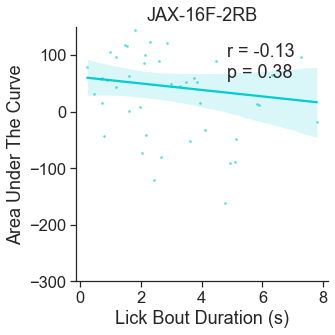

<Figure size 1200x1200 with 0 Axes>

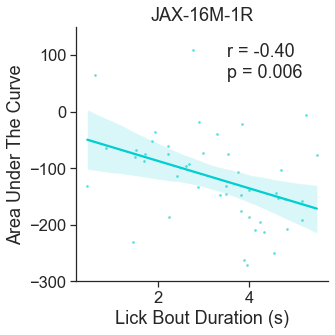

<Figure size 1200x1200 with 0 Axes>

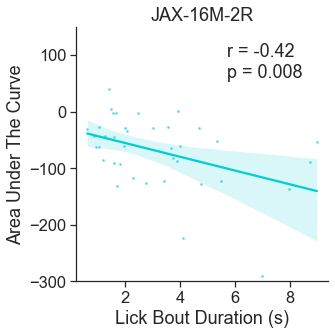

<Figure size 1200x1200 with 0 Axes>

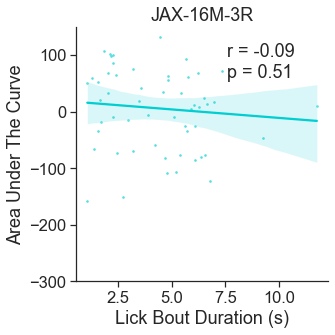

<Figure size 1200x1200 with 0 Axes>

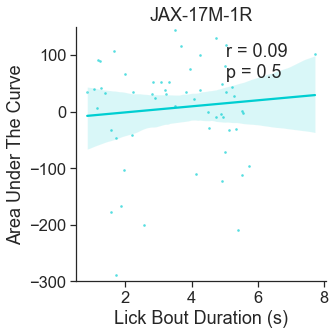

<Figure size 1200x1200 with 0 Axes>

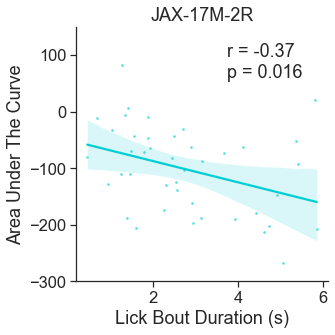

In [23]:
for mouse in sortableDF3[sortableDF3['Projection_Type'] == 'ZI-SC']['Mouse'].unique().tolist():

    plt.figure(figsize = (4,4), dpi = 300)
    df = sortableDF3[(sortableDF3['variable'] == 'area_3') & (sortableDF3['Mouse']==mouse) ]
    ax = sns.lmplot(df,x='LickBoutDuration_s', 
                          y = 'value',
                           hue = 'Projection_Type',
                           palette = ['darkturquoise'],scatter_kws={"s": 3, 'alpha':0.5}, legend = False)

    plt.title(mouse)
    plt.legend([], frameon = False)
    ax.set(ylabel = 'Area Under The Curve', xlabel = 'Lick Bout Duration (s)', ylim = (-300,150))
    ax.map_dataframe(annotate)
    
    
    #plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/mouse/' + mouse + 'lmplot_area3vsLickBoutDuration2.svg', dpi = 300, bbox_inches = 'tight')
    #plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/mouse/' + mouse + 'lmplot_area3vsLickBoutDuration2.png', dpi = 300, bbox_inches = 'tight')

<Figure size 1200x1200 with 0 Axes>

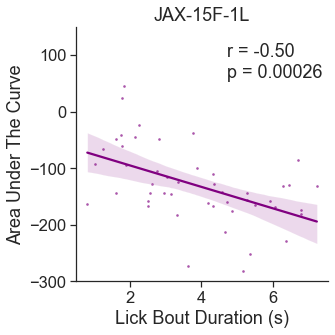

<Figure size 1200x1200 with 0 Axes>

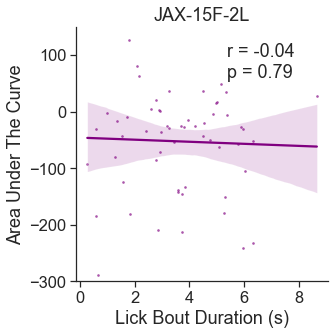

<Figure size 1200x1200 with 0 Axes>

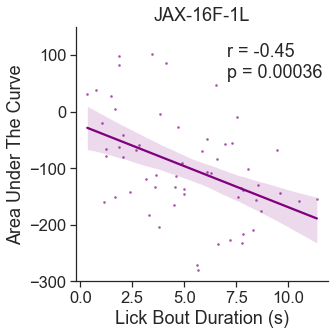

<Figure size 1200x1200 with 0 Axes>

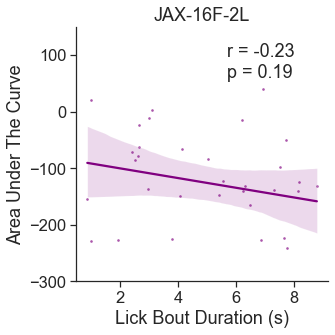

<Figure size 1200x1200 with 0 Axes>

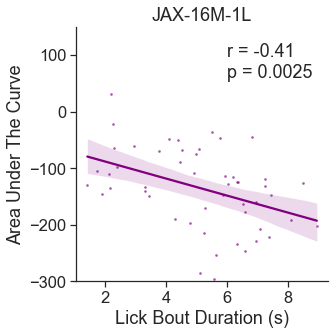

<Figure size 1200x1200 with 0 Axes>

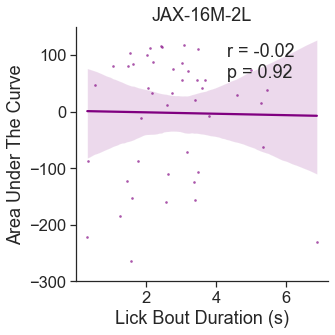

<Figure size 1200x1200 with 0 Axes>

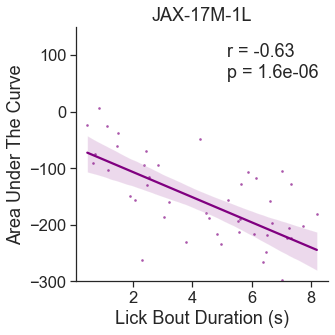

<Figure size 1200x1200 with 0 Axes>

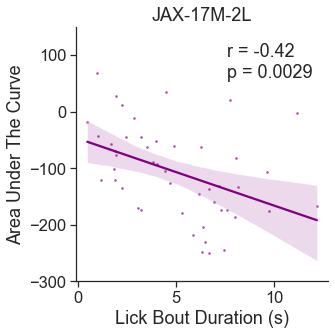

<Figure size 1200x1200 with 0 Axes>

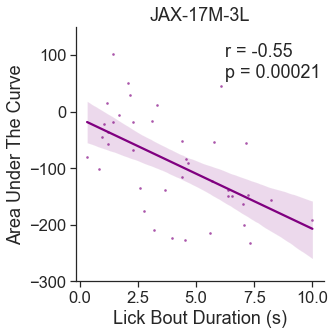

In [25]:
for mouse in sortableDF3[sortableDF3['Projection_Type'] == 'ZI-PRN']['Mouse'].unique().tolist():

    plt.figure(figsize = (4,4), dpi = 300)
    df = sortableDF3[(sortableDF3['variable'] == 'area_3') & (sortableDF3['Mouse']==mouse) ]
    ax = sns.lmplot(df,x='LickBoutDuration_s', 
                          y = 'value',
                           hue = 'Projection_Type',
                           palette = ['purple'],scatter_kws={"s": 3, 'alpha':0.5}, legend = False)

    plt.title(mouse)
    
    ax.set(ylabel = 'Area Under The Curve', xlabel = 'Lick Bout Duration (s)', ylim = (-300,150))
    ax.map_dataframe(annotate)
    
    #plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/mouse/' + mouse + 'lmplot_area3vsLickBoutDuration2.svg', dpi = 300, bbox_inches = 'tight')
    #plt.savefig('/Volumes/ryanKast/RKDATA/Behavior/FiberPhotometryData/Analysis/DND_DiscreteAnalysis/PhotometryFigures/mouse/' + mouse + 'lmplot_area3vsLickBoutDuration2.png', dpi = 300, bbox_inches = 'tight')

## Ordinary least squares regression ignoring the clustering of lick bouts from each mouse

In [31]:
model = smf.ols("value ~ LickBoutDuration_s", 
                     data=sortableDF3[(sortableDF3['variable'] == 'area_3') & (sortableDF3['Projection_Type'] == 'ZI-PRN')])
result = model.fit()
print(result.summary())
result.pvalues

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     86.69
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           6.70e-19
Time:                        10:23:49   Log-Likelihood:                -2535.0
No. Observations:                 430   AIC:                             5074.
Df Residuals:                     428   BIC:                             5082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -26.8313      8

Intercept             2.532258e-03
LickBoutDuration_s    6.701918e-19
dtype: float64

In [32]:
model = smf.ols("value ~ LickBoutDuration_s", 
                     data=sortableDF3[(sortableDF3['variable'] == 'area_3') & (sortableDF3['Projection_Type'] == 'ZI-SC')])
result = model.fit()
print(result.summary())
result.pvalues

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.571
Date:                Thu, 18 Jul 2024   Prob (F-statistic):            0.00360
Time:                        10:23:54   Log-Likelihood:                -2557.3
No. Observations:                 423   AIC:                             5119.
Df Residuals:                     421   BIC:                             5127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2994      9

Intercept             0.975761
LickBoutDuration_s    0.003601
dtype: float64

In [29]:
model = smf.ols("value ~ LickBoutDuration_s", 
                     data=sortableDF3[(sortableDF3['variable'] == 'peak_neg_3') & (sortableDF3['Projection_Type'] == 'ZI-PRN')])
result = model.fit()
print(result.summary())
result.pvalues

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     46.03
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           3.89e-11
Time:                        10:22:58   Log-Likelihood:                -544.45
No. Observations:                 430   AIC:                             1093.
Df Residuals:                     428   BIC:                             1101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1579      0

Intercept             1.516084e-34
LickBoutDuration_s    3.889791e-11
dtype: float64

In [30]:
model = smf.ols("value ~ LickBoutDuration_s", 
                     data=sortableDF3[(sortableDF3['variable'] == 'peak_neg_3') & (sortableDF3['Projection_Type'] == 'ZI-SC')])
result = model.fit()
print(result.summary())
result.pvalues

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8489
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.357
Time:                        10:23:15   Log-Likelihood:                -602.62
No. Observations:                 423   AIC:                             1209.
Df Residuals:                     421   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8470      0

Intercept             5.713658e-17
LickBoutDuration_s    3.574032e-01
dtype: float64

In [ ]:
model = smf.ols("value ~ LickBoutDuration_s", 
                     data=sortableDF3[(sortableDF3['variable'] == 'peak_neg_3') & (sortableDF3['PT'] == 1)])
result = model.fit()
print(result.summary())
result.pvalues

## Model a random effect for each mouse and run the mixedlm separately on each Projection_Type group 

In [54]:
# ZI-PRN and AUC 0-5s
model2 = smf.mixedlm("value ~ LickBoutDuration_s",  
                     data= sortableDF3[(sortableDF3['variable'] == 'area_3') &
                                        (sortableDF3['Projection_Type'] == 'ZI-PRN')], 
                     groups= "Mouse")

result = model2.fit(method = ["cg"]) # Try using 'lbfgs', 'cg', or 'bfgs'
print(result.summary())
result.pvalues

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    value     
No. Observations:    430        Method:                REML      
No. Groups:          9          Scale:                 6470.8859 
Min. group size:     34         Log-Likelihood:        -2501.9600
Max. group size:     59         Converged:             Yes       
Mean group size:     47.8                                        
-----------------------------------------------------------------
                    Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           -40.189   15.438 -2.603 0.009 -70.446  -9.932
LickBoutDuration_s  -13.930    1.739 -8.012 0.000 -17.337 -10.522
Mouse Var          1501.523   10.310                             



Intercept             9.231471e-03
LickBoutDuration_s    1.127230e-15
Mouse Var             7.022129e-02
dtype: float64

In [40]:
# ZI-SC and AUC 0-5s

model3 = smf.mixedlm("value ~ LickBoutDuration_s",  
                     data= sortableDF3[(sortableDF3['variable'] == 'area_3') &
                                        (sortableDF3['Projection_Type'] == 'ZI-SC')], 
                     groups= "Mouse")

result = model3.fit(method = ["cg"])
print(result.summary())
result.pvalues

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   value     
No. Observations:     423       Method:               REML      
No. Groups:           9         Scale:                7341.3132 
Min. group size:      38        Log-Likelihood:       -2490.4223
Max. group size:      58        Converged:            Yes       
Mean group size:      47.0                                      
----------------------------------------------------------------
                    Coef.   Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------
Intercept            -2.465   21.642 -0.114 0.909 -44.882 39.953
LickBoutDuration_s   -8.115    2.228 -3.642 0.000 -12.481 -3.748
Mouse Var          3573.823   21.993                            



Intercept             0.909323
LickBoutDuration_s    0.000270
Mouse Var             0.057883
dtype: float64

In [60]:
# ZI-PRN and negative peak amplitude 0-5s

model2 = smf.mixedlm("value ~ LickBoutDuration_s",  
                     data= sortableDF3[(sortableDF3['variable'] == 'peak_neg_3') &
                                        (sortableDF3['Projection_Type'] == 'ZI-PRN')], 
                     groups= "Mouse")

result = model2.fit(method = ["cg"]) # Try using 'lbfgs', 'cg', or 'bfgs'
print(result.summary())
result.pvalues

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   value    
No. Observations:   430       Method:               REML     
No. Groups:         9         Scale:                0.6228   
Min. group size:    34        Log-Likelihood:       -522.4015
Max. group size:    59        Converged:            Yes      
Mean group size:    47.8                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          -1.249    0.146 -8.527 0.000 -1.536 -0.962
LickBoutDuration_s -0.103    0.017 -6.032 0.000 -0.136 -0.069
Mouse Var           0.131    0.092                           



Intercept             1.502936e-17
LickBoutDuration_s    1.619175e-09
Mouse Var             7.176003e-02
dtype: float64

In [61]:
# ZI-PRN and negative peak amplitude 0-5s

model3 = smf.mixedlm("value ~ LickBoutDuration_s",  
                     data= sortableDF3[(sortableDF3['variable'] == 'peak_neg_3') &
                                        (sortableDF3['Projection_Type'] == 'ZI-SC')], 
                     groups= "Mouse")

result = model3.fit(method = ["cg"])
print(result.summary())
result.pvalues

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   value    
No. Observations:   423       Method:               REML     
No. Groups:         9         Scale:                0.7062   
Min. group size:    38        Log-Likelihood:       -543.5729
Max. group size:    58        Converged:            Yes      
Mean group size:    47.0                                     
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          -0.866    0.214 -4.042 0.000 -1.286 -0.446
LickBoutDuration_s -0.029    0.022 -1.327 0.185 -0.072  0.014
Mouse Var           0.351    0.220                           



Intercept             0.000053
LickBoutDuration_s    0.184631
Mouse Var             0.057632
dtype: float64

## Run the mixedlm while passing 'Projection_Type' variable as a categorical predictor

In [47]:
#AUC - Running with a categorical fixed variable assigned as Projection_Type
model4 = smf.mixedlm("value ~ LickBoutDuration_s * C(Projection_Type)",  
                     data= sortableDF3[(sortableDF3['variable'] == 'area_3')], 
                     groups= "Mouse",
                     vc_formula = {"Mouse" : "1 + C(Mouse)"})

result = model4.fit(method = ["cg"])
print(result.summary())
result.pvalues

                            Mixed Linear Model Regression Results
Model:                         MixedLM             Dependent Variable:             value     
No. Observations:              853                 Method:                         REML      
No. Groups:                    18                  Scale:                          6902.4332 
Min. group size:               34                  Log-Likelihood:                 -4993.8671
Max. group size:               59                  Converged:                      Yes       
Mean group size:               47.4                                                          
---------------------------------------------------------------------------------------------
                                                Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------------
Intercept                                       -40.661   18.922 -2.149 0.032 -77.748  -

Intercept                                         3.164698e-02
C(Projection_Type)[T.ZI-SC]                       1.505040e-01
LickBoutDuration_s                                1.260141e-14
LickBoutDuration_s:C(Projection_Type)[T.ZI-SC]    4.154553e-02
Mouse Var                                         8.143253e-03
dtype: float64

In [46]:
#Peak Neg Amp - Running with a categorical fixed variable assigned as Projection_Type
model4 = smf.mixedlm("value ~ LickBoutDuration_s * C(Projection_Type)",  # the '*' models the interaction between LickBoutDuration and the Projection_Type category
                     data= sortableDF3[(sortableDF3['variable'] == 'peak_neg_3')], 
                     groups= "Mouse",
                     vc_formula = {"Mouse" : "1 + C(Mouse)"}) # 1 + : assume that all licking bouts are associated with a change in GCaMP fluroescence at the zero s lick bout timepoint  

result = model4.fit(method = ["cg"])
print(result.summary())
result.pvalues

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            value     
No. Observations:            853                Method:                        REML      
No. Groups:                  18                 Scale:                         0.6642    
Min. group size:             34                 Log-Likelihood:                -1067.6328
Max. group size:             59                 Converged:                     Yes       
Mean group size:             47.4                                                        
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      -1.253    0.185 -6.783 0.000 -1.615 -0.891
C(Projection_Type)[T.ZI-SC]         

Intercept                                         1.179439e-11
C(Projection_Type)[T.ZI-SC]                       1.358153e-01
LickBoutDuration_s                                6.965062e-09
LickBoutDuration_s:C(Projection_Type)[T.ZI-SC]    8.066149e-03
Mouse Var                                         8.157696e-03
dtype: float64

## Model while ignoring the Projection Type variable 

In [59]:
model = smf.mixedlm("value ~ LickBoutDuration_s",  
                     data=sortableDF3[(sortableDF3['variable'] == 'area_3')], 
                     groups= "Mouse",
                    vc_formula = {'Mouse':'0 + C(Mouse)'})

result = model.fit(method = ["bfgs"])
print(result.summary())
result.pvalues

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   value     
No. Observations:     853       Method:               REML      
No. Groups:           18        Scale:                6925.6744 
Min. group size:      34        Log-Likelihood:       -5004.6214
Max. group size:      59        Converged:            Yes       
Mean group size:      47.4                                      
----------------------------------------------------------------
                    Coef.   Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------
Intercept           -20.574   14.929 -1.378 0.168 -49.835  8.687
LickBoutDuration_s  -11.618    1.383 -8.402 0.000 -14.328 -8.908
Mouse Var          3366.344   14.644                            



Intercept             1.681743e-01
LickBoutDuration_s    4.398630e-17
Mouse Var             5.739717e-03
dtype: float64